<a href="https://colab.research.google.com/github/VaishnaviMariappan/mnist-classification/blob/main/DL03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[13]

In [ ]:
single_image.shape

(28, 28)

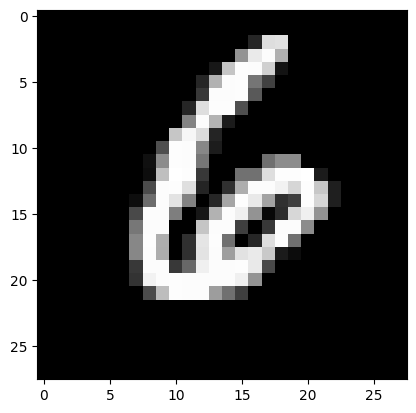

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[13]

6

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

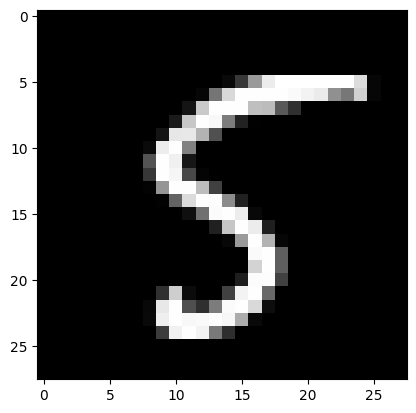

In [ ]:
single_image = X_train[912]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[912]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=25,kernel_size=(7,7),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(41,activation="relu"))
model.add(layers.Dense(35,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 22, 22, 25)        1250      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 25)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3025)              0         
                                                                 
 dense_3 (Dense)             (None, 41)                124066    
                                                                 
 dense_4 (Dense)             (None, 35)                1470      
                                                                 
 dense_5 (Dense)             (None, 10)                360       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=6,
          batch_size=59,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/6
1017/1017 [==============================] - 37s 36ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 2/6
1017/1017 [==============================] - 37s 37ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0343 - val_accuracy: 0.9876
Epoch 3/6
1017/1017 [==============================] - 36s 36ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0367 - val_accuracy: 0.9871
Epoch 4/6
1017/1017 [==============================] - 35s 35ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0443 - val_accuracy: 0.9851
Epoch 5/6
1017/1017 [==============================] - 36s 35ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0456 - val_accuracy: 0.9881
Epoch 6/6
1017/1017 [==============================] - 36s 36ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0408 - val_accuracy: 0.9886


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.043333,0.986383,0.035992,0.9879
1,0.035297,0.988817,0.034306,0.9876
2,0.027124,0.991633,0.036690,0.9871
3,0.022445,0.992700,0.044320,0.9851
4,0.018168,0.994083,0.045552,0.9881


<Axes: >

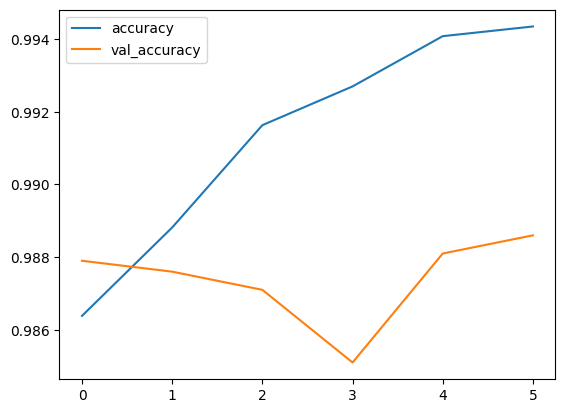

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

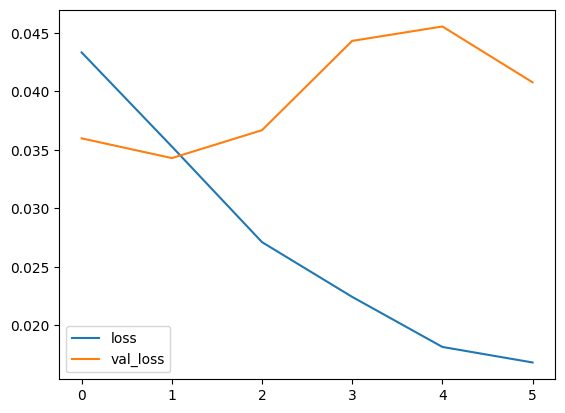

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 978    0    0    0    0    0    0    0    1    1]
 [   0 1131    0    0    1    1    1    1    0    0]
 [   3    1 1015    1    6    0    0    6    0    0]
 [   0    0    2  998    0    4    0    3    3    0]
 [   0    0    0    0  975    0    3    0    1    3]
 [   2    0    0    6    0  882    1    0    1    0]
 [   3    2    0    0    5    1  945    0    2    0]
 [   0    2    3    0    2    0    0 1016    2    3]
 [   4    0    3    1    1    2    0    2  957    4]
 [   1    2    0    0    8    4    0    3    2  989]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('Img.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('Img.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(x_single_prediction)

[1]


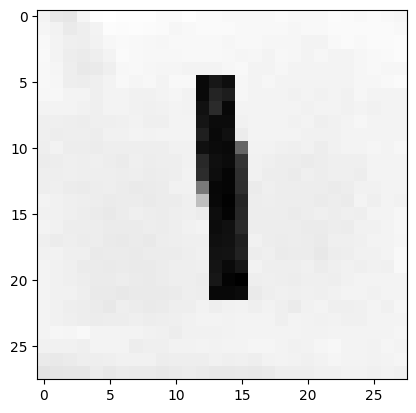

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
print(x_single_prediction)

[1]
